## Semi-supervised Supplementary Figures

In this notebook, I will plot the validation results for each of the following semi-supervised models:

1. 2.2 chemistry
2. 3.2 chemistry
3. Revio

In [5]:
# Import needed libraries

import numpy as np
import configparser
import matplotlib.pyplot as plt

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

### Plots for 2.2, 3.2 and Revio chemistry semi-supervised model

The data for the following plots is located in zenodo. Run the following instructions in the current directory to prepare data: 


```bash
mkdir -p data
cd data

wget https://zenodo.org/record/7809229/files/fibertoolsMLTrain.tar.gz
tar -zxvf fibertoolsMLTrain.tar.gz
```

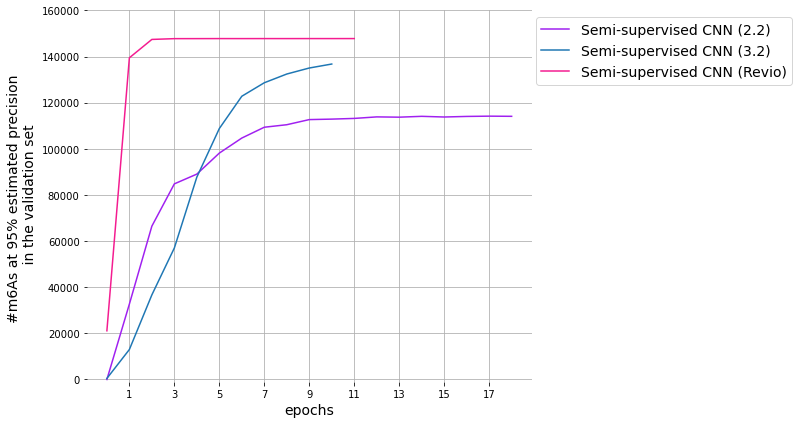

In [7]:
semi_model_2_2_path = "data/fibertoolsMLTrain/inter_data/val_pos_identified_2.2.npz"
semi_model_3_2_path = "data/fibertoolsMLTrain/inter_data/val_pos_identified_PS00243_mrv.npz"
semi_model_revio_path = "data/fibertoolsMLTrain/inter_data/val_pos_identified_Revio_GM12878_244_ec_6.npz"


semi_model_2_2 = np.load(semi_model_2_2_path)
semi_model_3_2 = np.load(semi_model_3_2_path)
semi_model_revio = np.load(semi_model_revio_path)

num_pos_2_2 = semi_model_2_2['num_pos'] 
num_pos_3_2 = semi_model_3_2['num_pos']
num_pos_revio = semi_model_revio['num_pos'] 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

x_2_2 = np.arange(0, len(num_pos_2_2))
ax.plot(x_2_2, num_pos_2_2, c="#A020F0", label="Semi-supervised CNN (2.2)")

x_3_2 = np.arange(0, len(num_pos_3_2))
ax.plot(x_3_2, num_pos_3_2, label="Semi-supervised CNN (3.2)")

x_revio = np.arange(0, len(num_pos_revio))
ax.plot(x_revio, num_pos_revio, c="#F41C90", label="Semi-supervised CNN (Revio)")

ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17])
ax.set_xticklabels([1, 3, 5, 7, 9, 11, 13, 15, 17])

ax.set_ylim([-1000, 160000])
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])
ax.set_yticklabels([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])


ax.set_xlabel("epochs", fontsize=14)
ax.set_ylabel("#m6As at 95% estimated precision \n in the validation set", fontsize=14)

simpleaxis(ax)
ax.grid(True)

plt.legend(bbox_to_anchor=(1.6, 1.0), fontsize=14)
plt.tight_layout()
plt.savefig("figures/sup_figure_semi_supervised.pdf", transparent=True)
plt.show()